
please mount google drive before you begin

# Part I: Set-up

In [1]:
cd /content/drive/MyDrive/DEX_Uniswap_Layer2/Opt

/content/drive/MyDrive/DEX_Uniswap_Layer2/Opt


In [2]:
pwd

'/content/drive/MyDrive/DEX_Uniswap_Layer2/Opt'

In [3]:
# importing pandas libraries and
# glob module
import pandas as pd

In [4]:
df_Opt = pd.read_csv("Opt_Amount.csv",index_col="Unnamed: 0")
df_Opt['Timestamp']=pd.to_datetime(df_Opt['Timestamp'])
df_Opt.dtypes

Timestamp     datetime64[ns]
Amount_USD           float64
dtype: object

In [5]:
df_Opt.tail()

,Timestamp,Amount_USD
15272496,2022-12-31 23:59:56,0.000000
15270867,2022-12-31 23:59:56,41.736739
15278487,2022-12-31 23:59:56,62.923161
15312565,2022-12-31 23:59:56,29.935998
15289389,2022-12-31 23:59:56,0.054918


# Part II Calculating Daily Transaction Volume

In [6]:
df_Opt['date'] =df_Opt['Timestamp'].dt.date
df_Opt

,Timestamp,Amount_USD,date
13982,2022-02-01 00:03:14,0.000000,2022-02-01
51878,2022-02-01 00:03:14,0.000000,2022-02-01
38688,2022-02-01 00:03:14,1263.197957,2022-02-01
12137,2022-02-01 00:03:14,0.000000,2022-02-01
34189,2022-02-01 00:03:14,0.000000,2022-02-01
...,...,...,...
15272496,2022-12-31 23:59:56,0.000000,2022-12-31
15270867,2022-12-31 23:59:56,41.736739,2022-12-31
15278487,2022-12-31 23:59:56,62.923161,2022-12-31
15312565,2022-12-31 23:59:56,29.935998,2022-12-31


In [7]:
import numpy as np
# Calculate statistics for 'Amount_USD' column and add count of observations
agg_funcs = {
    'Amount_USD': [np.min, np.max, np.sum, np.std, np.var, np.mean, np.median, lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 25)]
}

# Add count of observations
agg_funcs['Amount_USD'].append(lambda x: x.count())

# Convert the 'date' column to datetime
#df_Opt['date'] = pd.to_datetime(df_Opt['date'])
df_Opt_volume = df_Opt.groupby('date').agg(agg_funcs).reset_index()

# Rename the columns for clarity
df_Opt_volume.columns = ['date', 'min', 'max', 'sum', 'std', 'var', 'mean', 'median', 'percentile_75', 'percentile_25', 'count']

df_Opt_volume

,date,min,max,sum,std,var,mean,median,percentile_75,percentile_25,count
0,2022-02-01,0.0,190524.153458,4.485046e+06,3246.987424,1.054293e+07,394.532572,0.000000,0.000000,0.0,11368
1,2022-02-02,0.0,65164.062111,7.351700e+06,2588.309119,6.699344e+06,613.357276,0.000000,25.130396,0.0,11986
2,2022-02-03,0.0,251073.000001,5.811637e+06,4032.671435,1.626244e+07,564.400995,0.000000,0.000000,0.0,10297
3,2022-02-04,0.0,999836.799371,1.482760e+07,13801.624687,1.904848e+08,1210.219000,0.000000,46.306221,0.0,12252
4,2022-02-05,0.0,94517.816585,4.207710e+06,2827.169931,7.992890e+06,497.541663,0.000000,14.071398,0.0,8457
...,...,...,...,...,...,...,...,...,...,...,...
296,2022-12-27,0.0,107404.486103,1.384883e+07,1355.683641,1.837878e+06,179.808233,20.985132,63.960048,0.0,77020
297,2022-12-28,0.0,73517.677046,1.239968e+07,966.665256,9.344417e+05,140.636910,20.281617,59.637761,0.0,88168
298,2022-12-29,0.0,30055.580795,1.029891e+07,679.110793,4.611915e+05,139.549671,19.978427,59.741542,0.0,73801
299,2022-12-30,0.0,115165.991524,9.751536e+06,1635.082288,2.673494e+06,162.468743,19.054187,54.298064,0.0,60021


In [8]:
df_Opt_volume.to_csv("Opt_volume.csv")

In [9]:
df_Opt_volume.dtypes

date              object
min              float64
max              float64
sum              float64
std              float64
var              float64
mean             float64
median           float64
percentile_75    float64
percentile_25    float64
count              int64
dtype: object

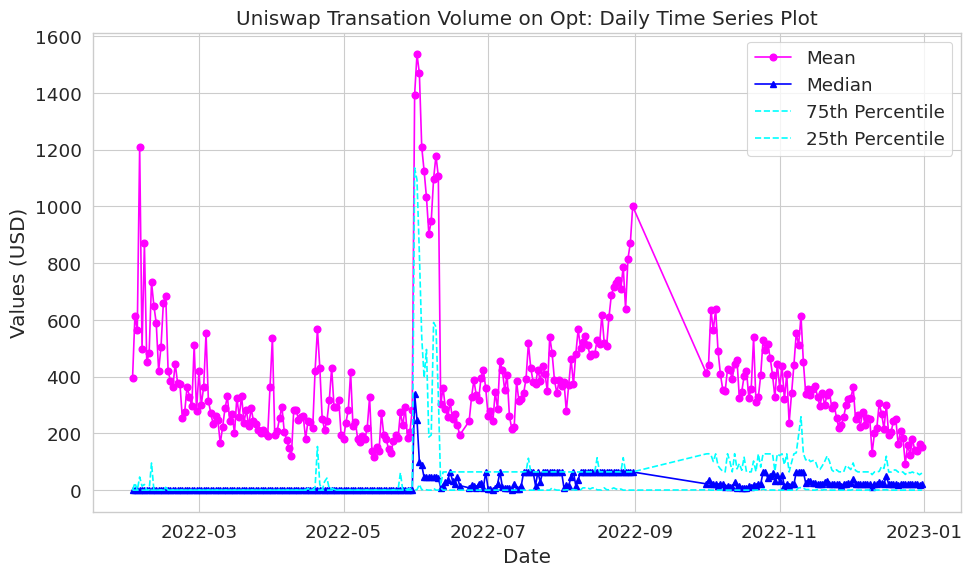

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df =df_Opt_volume.copy()
df['date'] = pd.to_datetime(df['date'])
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'mean' with a warm color and solid line
plt.plot(df.index, df['mean'], label='Mean', marker='o', color='magenta', linestyle='-')

# Plot 'median', '75th Percentile', and '25th Percentile' with the same cold color and different markers
plt.plot(df.index, df['median'], label='Median', marker='^', color='blue', linestyle='-')
plt.plot(df.index, df['percentile_75'], label='75th Percentile', color='cyan', linestyle='--')
plt.plot(df.index, df['percentile_25'], label='25th Percentile',  color='cyan', linestyle='--')

# Customize the plot
plt.title('Uniswap Transation Volume on Opt: Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values (USD)')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Opt_volume.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


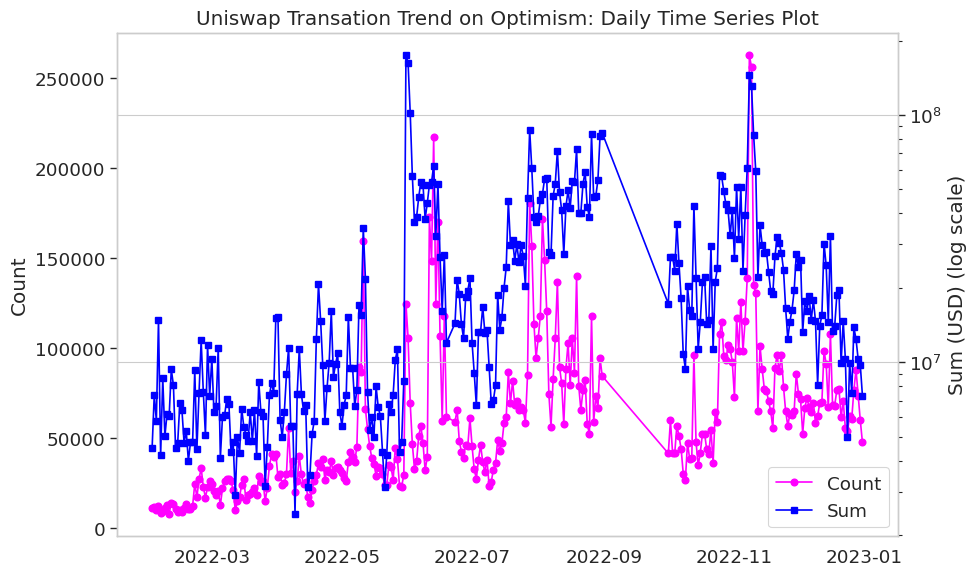

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df_Opt_volume['date'] = pd.to_datetime(df_Opt_volume['date'])

df =df_Opt_volume.copy()
# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size

# Create the time series plot
plt.figure(figsize=(10, 6))

# Plot 'count' on the primary y-axis
count_line, = plt.plot(df.index, df['count'], label='Count', marker='o', color='magenta', linestyle='-')
plt.ylabel('Count')

# Create a secondary y-axis for 'sum' with a logarithmic scale
ax2 = plt.twinx()
ax2.set_yscale("log")  # Apply logarithmic scale to the secondary y-axis
sum_line, = ax2.plot(df.index, df['sum'], label='Sum', marker='s', color='blue', linestyle='-')
ax2.set_ylabel('Sum (USD) (log scale)')


# Combine legends from both axes
lines = [count_line, sum_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='lower right')

# Customize the plot
plt.title('Uniswap Transation Trend on Optimism: Daily Time Series Plot')
plt.xlabel('Date')
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Opt_transaction_trend.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()


# Part III Calculating Decentralized Index

In [12]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import pytz

In [13]:
def index(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    H = -df['prop']*np.log2(df['prop'])
    E = H.sum()
    V = 2**E
    return V

def HHI(df):
    df['Amount_USD'] = df['Amount_USD'].astype(float)
    df['prop'] = (df['Amount_USD']/df['Amount_USD'].sum())*100
    SQ = df['prop']**2
    V = SQ.sum()
    return V

def gini(df):
    """
    Compute Gini coefficient of a DataFrame with a 'value' column
    """
    # Check if the DataFrame is empty or the 'value' column does not exist
    if df.empty or 'Amount_USD' not in df.columns:
        return None
    # Extract the 'value' column and convert it to a sorted list
    values = sorted(df['Amount_USD'].tolist())
    # Check if the list is empty
    if len(values) == 0:
        return None
    # Compute the cumulative sum of the values
    cum_values = [0] + list(pd.Series(values).cumsum())
    n = len(values)
    # Calculate Gini coefficient using the formula
    numer = sum([(i+1) * values[i] for i in range(n)])
    denom = n * sum(values)
    if denom == 0:
        return None  # Avoid division by zero
    gini = (2 * numer) / denom - (n + 1) / n
    return gini

def nakamoto(df):
    df.sort_values(by=['Amount_USD'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['Amount_USD']/df['Amount_USD'].sum()
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V
    except:
        return 0

"""
def index_calc(data):

            :param data: dataframe containing transaction Amount_USD and timestamp of the transaction (Timestamp)
            :type data: pandas.DataFrame object
            :param start: the start date of calculation 00:00:00 UTC
            :type start: datetime.date object
            :param end: the end date of calculation 23:59:59 UTC
            :type end: datetime.date object
            :param index_type: the metrics used for measuring decentralization, default is our index
            :type index_type: index function

    returns pandas dataframe with decentralization index Amount_USD and date
"""
from tqdm import tqdm
def index_calc(data,  start, end, index_type = index):
    duration= pd.date_range(start=start, end=end)
    days = np.size(duration)
    IndexValues = pd.DataFrame(np.zeros(days), columns=['val'])
    IndexValues['date'] = duration

    for i in tqdm(range(0, days)):
        start_date = start + timedelta(days=i)
        end_date = start_date + timedelta(days=1)
        IndexValues.loc[i,'val'] = index_type(data[(data['date'] >= start_date) & (data['date'] < end_date)].copy())

    return IndexValues

In [ ]:
#input transaction data and desired date range
#returns index value 1 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results = index_calc(df_Opt,start,end)
results.to_csv("Opt_Entropy.csv")
results

 32%|███▏      | 154/488 [05:06<11:07,  2.00s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
 32%|███▏      | 155/488 [05:08<11:00,  1.98s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
 32%|███▏      | 156/488 [05:10<10:57,  1.98s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
 32%|███▏      | 157/488 [05:12<10:52,  1.97s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
 32%|███▏      | 158/488 [05:14<10:51,  1.97s/it]/usr/local/lib/python3.10/dist-packages/pandas/core/arrayli

,val,date
0,1.000000,2021-08-31
1,1.000000,2021-09-01
2,1.000000,2021-09-02
3,1.000000,2021-09-03
4,1.000000,2021-09-04
...,...,...
483,6333.445608,2022-12-27
484,7450.505888,2022-12-28
485,8028.982437,2022-12-29
486,3011.235988,2022-12-30


In [ ]:
df = pd.read_csv("Opt_Entropy.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,6333.445608,2022-12-27
484,7450.505888,2022-12-28
485,8028.982437,2022-12-29
486,3011.235988,2022-12-30
487,3578.687870,2022-12-31


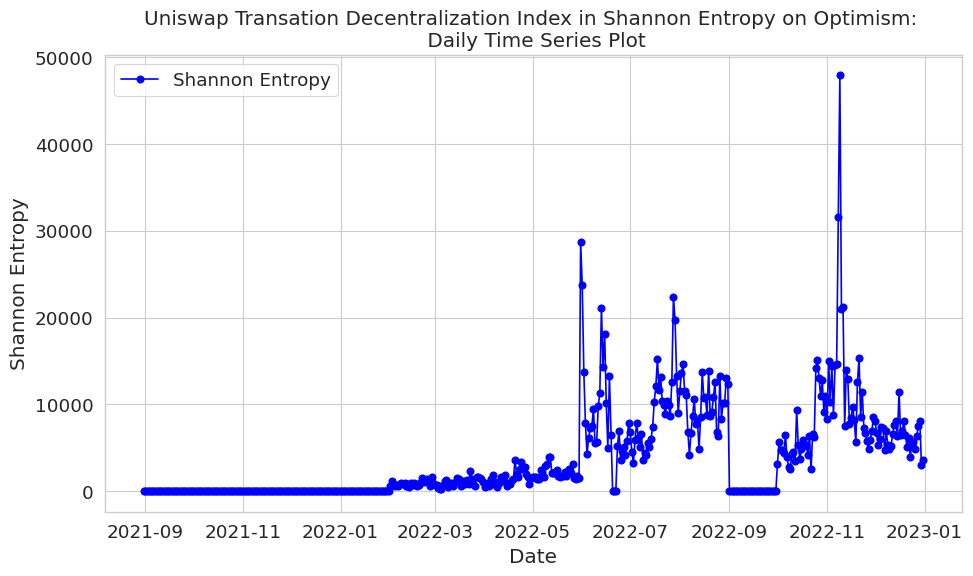

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Shannon Entropy', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Shannon Entropy on Optimism: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Shannon Entropy')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Opt_entropy.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [ ]:
#specify alternate index metric: HHI
#returns index value 0 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results_HHI = index_calc(df_Opt,start,end,HHI)
results_HHI.to_csv("Opt_HHI.csv")
results_HHI

100%|██████████| 488/488 [16:22<00:00,  2.01s/it]


,val,date
0,0.000000,2021-08-31
1,0.000000,2021-09-01
2,0.000000,2021-09-02
3,0.000000,2021-09-03
4,0.000000,2021-09-04
...,...,...
483,7.510381,2022-12-27
484,5.471851,2022-12-28
485,3.344394,2022-12-29
486,17.041039,2022-12-30


In [ ]:
df = pd.read_csv("Opt_HHI.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,7.510381,2022-12-27
484,5.471851,2022-12-28
485,3.344394,2022-12-29
486,17.041039,2022-12-30
487,22.319012,2022-12-31


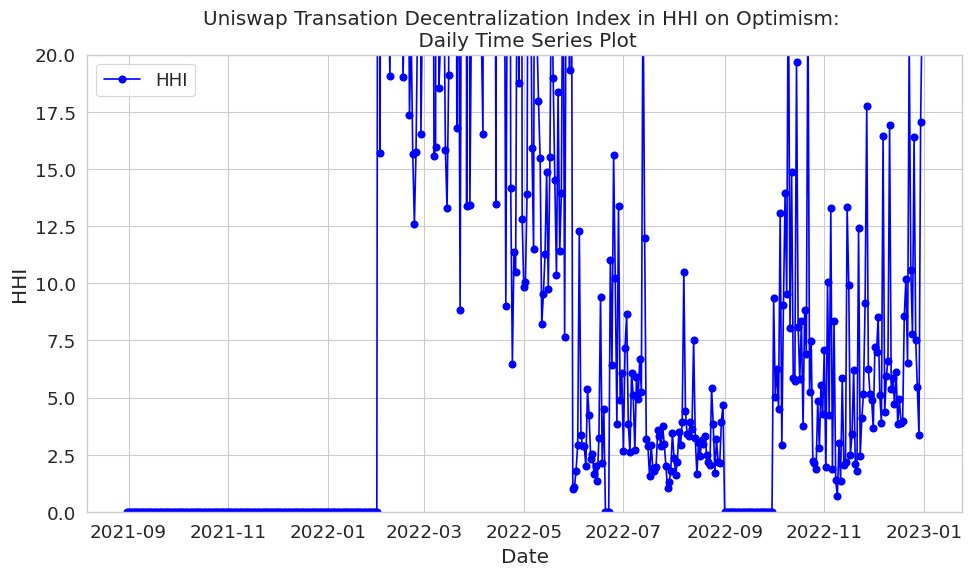

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='HHI', marker='o',color='blue')


# Customize the plot
plt.ylim(0, 20)  # Set y-axis limits
plt.title('Uniswap Transation Decentralization Index in HHI on Optimism: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('HHI')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Opt_HHI.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [ ]:
#specify alternate index metric: gini
#returns index value 0 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results_gini = index_calc(df_Opt,start,end,gini)
results_gini.to_csv("Opt_gini.csv")
results_gini

100%|██████████| 488/488 [16:57<00:00,  2.09s/it]


,val,date
0,NaN,2021-08-31
1,NaN,2021-09-01
2,NaN,2021-09-02
3,NaN,2021-09-03
4,NaN,2021-09-04
...,...,...
483,0.893705,2022-12-27
484,0.895169,2022-12-28
485,0.888062,2022-12-29
486,0.914374,2022-12-30


In [ ]:
df = pd.read_csv("Opt_gini.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,0.893705,2022-12-27
484,0.895169,2022-12-28
485,0.888062,2022-12-29
486,0.914374,2022-12-30
487,0.893425,2022-12-31


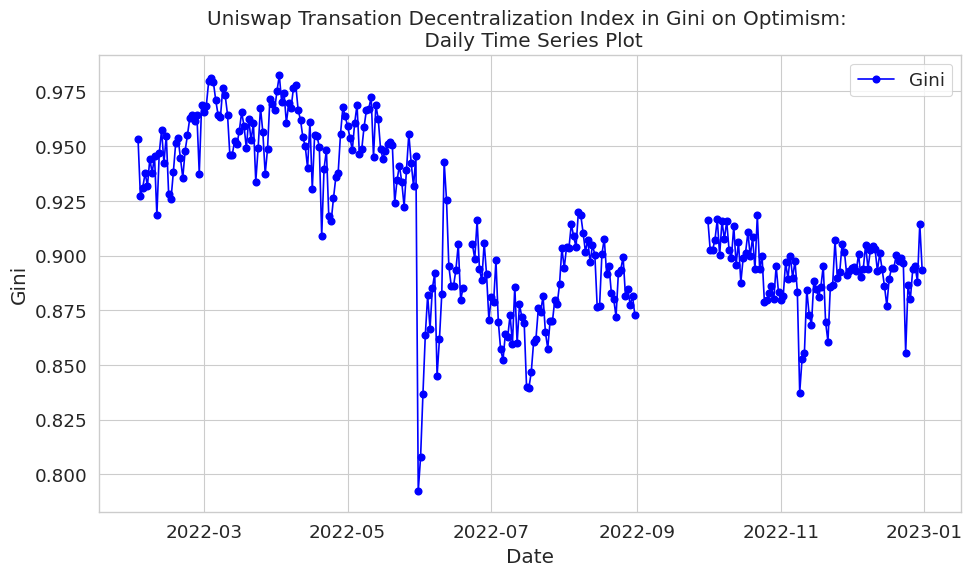

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Gini', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Gini on Optimism: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Gini')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Opt_gini.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()


In [ ]:
#specify alternate index metric: nakamoto coefficient
#returns index value 0 if specification range exceeds data
start = date(2021,8,31)
end = date(2022,12,31)
results_nakamoto = index_calc(df_Opt,start,end,nakamoto)
results_nakamoto.to_csv("Opt_nakamoto.csv")
results_nakamoto

100%|██████████| 488/488 [16:05<00:00,  1.98s/it]


,val,date
0,0.0,2021-08-31
1,0.0,2021-09-01
2,0.0,2021-09-02
3,0.0,2021-09-03
4,0.0,2021-09-04
...,...,...
483,1017.0,2022-12-27
484,1144.0,2022-12-28
485,1315.0,2022-12-29
486,405.0,2022-12-30


In [ ]:
df = pd.read_csv("Opt_nakamoto.csv", index_col="Unnamed: 0")
df.tail()

,val,date
483,1017.0,2022-12-27
484,1144.0,2022-12-28
485,1315.0,2022-12-29
486,405.0,2022-12-30
487,587.0,2022-12-31


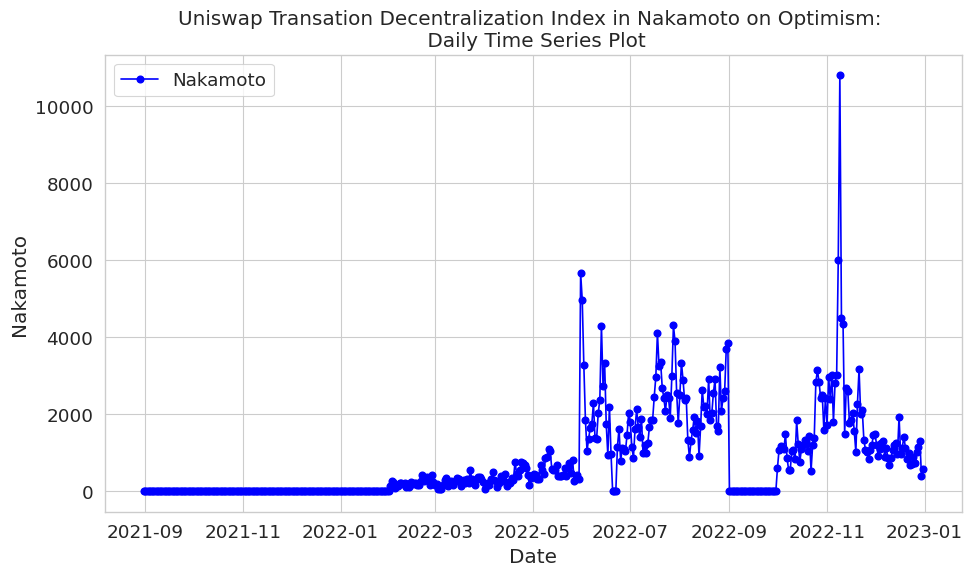

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Set the style to a scientific publication style
sns.set_style("whitegrid", {'axes.grid': False})
sns.set_context("paper", font_scale=1.5)  # Increase font size


# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['val'], label='Nakamoto', marker='o',color='blue')


# Customize the plot
plt.title('Uniswap Transation Decentralization Index in Nakamoto on Optimism: \n Daily Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Nakamoto')
plt.legend()
plt.grid(True)

# Save the figure as a high-resolution PNG
plt.tight_layout()
plt.savefig('uniswap_Opt_nakamoto.png', dpi=500)  # Adjust dpi for higher resolution
plt.show()
